In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from numpy.random import uniform
import random
from KMEANS import kmeans
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('glass-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
pd.reset_option('display.max_rows')
df_normalized

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.387056,0.127381,0.553080,-0.310744,-0.498534,-0.296275,-0.063113,-0.155646,-0.258803
1,-0.174042,0.425729,0.456357,-0.129105,0.069267,-0.020674,-0.564066,-0.252557,-0.419945
2,-0.471910,0.101802,0.398255,0.120512,0.285714,-0.110053,-0.543668,-0.233058,-0.387521
3,-0.188254,-0.197302,0.581264,-0.266983,-0.048343,0.090402,-0.427411,-0.293041,-0.487260
4,-0.222816,-0.119597,0.474686,-0.307694,0.399909,0.057016,-0.451643,-0.257117,-0.427526
...,...,...,...,...,...,...,...,...,...
208,-0.169363,0.218573,-0.450135,0.699662,-0.014124,-0.155546,0.038430,0.430413,-0.142360
209,-0.117280,0.440845,-0.440742,0.258849,0.124249,-0.181387,-0.092288,0.674062,-0.139390
210,0.182061,0.280743,-0.445106,0.275920,0.237035,-0.183183,-0.086473,0.704805,-0.140770
211,-0.148686,0.293238,-0.455388,0.242710,0.302749,-0.187415,-0.081587,0.686613,-0.144022


In [5]:
k = 6
data = df_normalized.values
clusters, centroids = kmeans(data, k)

In [6]:
# Calculate metrics
ch_index = calinski_harabasz_score(df_normalized, clusters)
silhouette_avg = silhouette_score(df_normalized, clusters)
db_index = davies_bouldin_score(df_normalized, clusters)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.2942317011291662
Calinski Harabasz Score: 74.50861378529123
Davies Bouldin Index: 1.2879533796926907


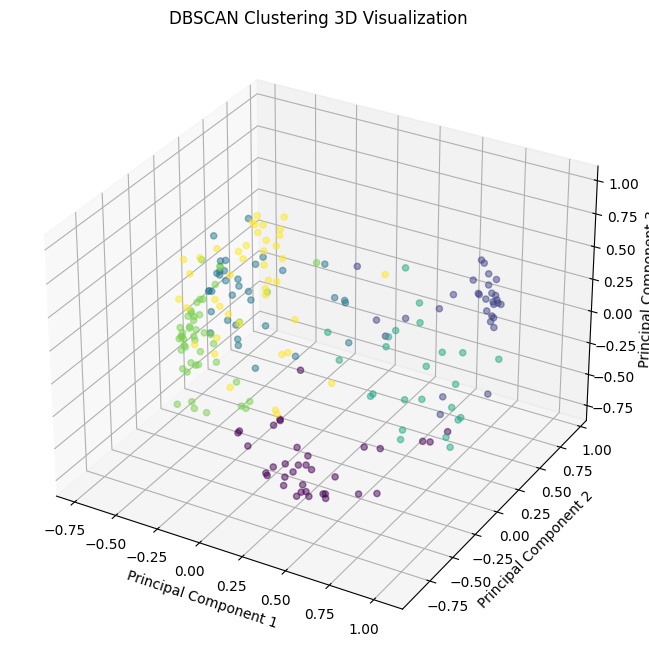

In [7]:
visualization(df_normalized, clusters)

In [8]:
interactive_visualization(df_normalized, clusters)

In [9]:
print(clusters.tolist().count(1))

30
